# Faults annotation

Here will show annotation format and structure of faults.

In [1]:
import os
import sys
import glob

sys.path.append('../..')

from seismiqb import *
from seismiqb.batchflow import FilesIndex

## Initial annotation

Faults can be sored in different formats (see `Fault` class documentation).
In our case each csv-like file corresponds to one fault.

In [2]:
CUBE_FOLDER = '/data/seismic_data/seismic_interpretation/CUBE_16_PSDM'

In [3]:
fault = glob.glob(CUBE_FOLDER + '/INPUTS/FAULTS/RAW/*')[0]

In [4]:
os.listdir(CUBE_FOLDER + '/INPUTS/FAULTS/RAW')

['new_fault_2',
 'new_fault_6',
 'new_fault_7',
 'new_fault_14',
 'new_fault_9',
 'new_fault_4',
 'new_fault_1',
 'new_fault_3',
 'new_fault_12',
 'new_fault_13',
 'new_fault_11',
 'new_fault_5',
 'new_fault_10',
 'new_fault_8']

Columns are `['INLINE', 'iline', 'xline', 'cdp_x', 'cdp_y', 'height', 'fault_name', 'stick_index']`

In [5]:
! head "{fault}"

INLINE- 85 384 10105384.07505 6241157.18939 2370.1205 Fault_interpretation_2 1
INLINE- 85 387 10105384.07505 6241221.8102400005 2933.8130100000003 Fault_interpretation_2 1
INLINE- 95 384 10105634.08409 6241157.18939 2382.8007 Fault_interpretation_2 2
INLINE- 95 387 10105634.08409 6241221.8102400005 2872.90962 Fault_interpretation_2 2
INLINE- 105 379 10105884.09313 6241027.94769 2386.0668100000003 Fault_interpretation_2 3
INLINE- 105 389 10105884.09313 6241286.4310800005 2904.99437 Fault_interpretation_2 3
INLINE- 115 379 10106134.10217 6241031.74892 2376.4606 Fault_interpretation_2 4
INLINE- 115 384 10106134.10217 6241157.18939 2882.51584 Fault_interpretation_2 4
INLINE- 125 369 10106384.11121 6240777.06676 2370.1205 Fault_interpretation_2 5
INLINE- 125 377 10106384.11121 6240967.12807 2895.38816 Fault_interpretation_2 5


Firstly, we check that all files have known structure. Otherwise, we have to fix some files.

In [6]:
Fault.check_format(CUBE_FOLDER + '/INPUTS/FAULTS/RAW/*', verbose=False)

At the loading stage, we interpolate each fault as a surface. 

In [7]:
%%time

cube_path = glob.glob(CUBE_FOLDER + '/amp*.hdf5')[0]

dataset = SeismicCubeset(FilesIndex(path=cube_path, no_ext=True))

dataset.load(label_dir='/INPUTS/FAULTS/RAW/*', labels_class=Fault, width=1)
dataset.modify_sampler(dst='train_sampler', finish=True)

CPU times: user 12.4 s, sys: 5.3 s, total: 17.7 s
Wall time: 12.1 s


Sticks interpolation is time consuming procedure, therefore we dump resulting points as a `.npy` files

In [8]:
dataset.dump_labels('/INPUTS/FAULTS/NPY', separate=True)

... and make loading faster!

In [9]:
%%time

dataset = SeismicCubeset(FilesIndex(path=cube_path, no_ext=True))

dataset.load(label_dir='/INPUTS/FAULTS/NPY/*', labels_class=Fault)
dataset.modify_sampler(dst='train_sampler', finish=True)

CPU times: user 2.41 s, sys: 410 ms, total: 2.82 s
Wall time: 2.82 s


# Map of faults

Now let's see the map of faults.

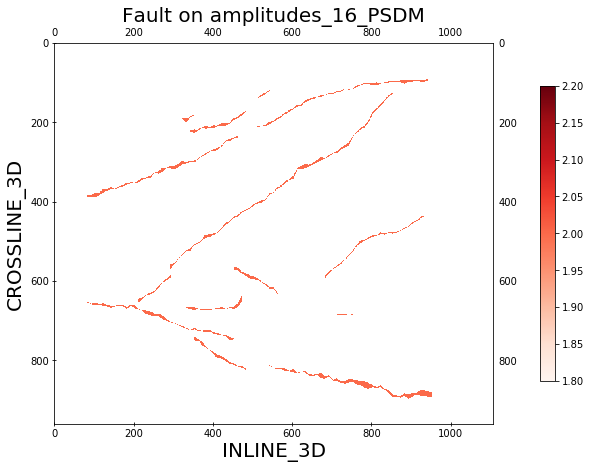

In [10]:
dataset.show_points()

And slice from the cube

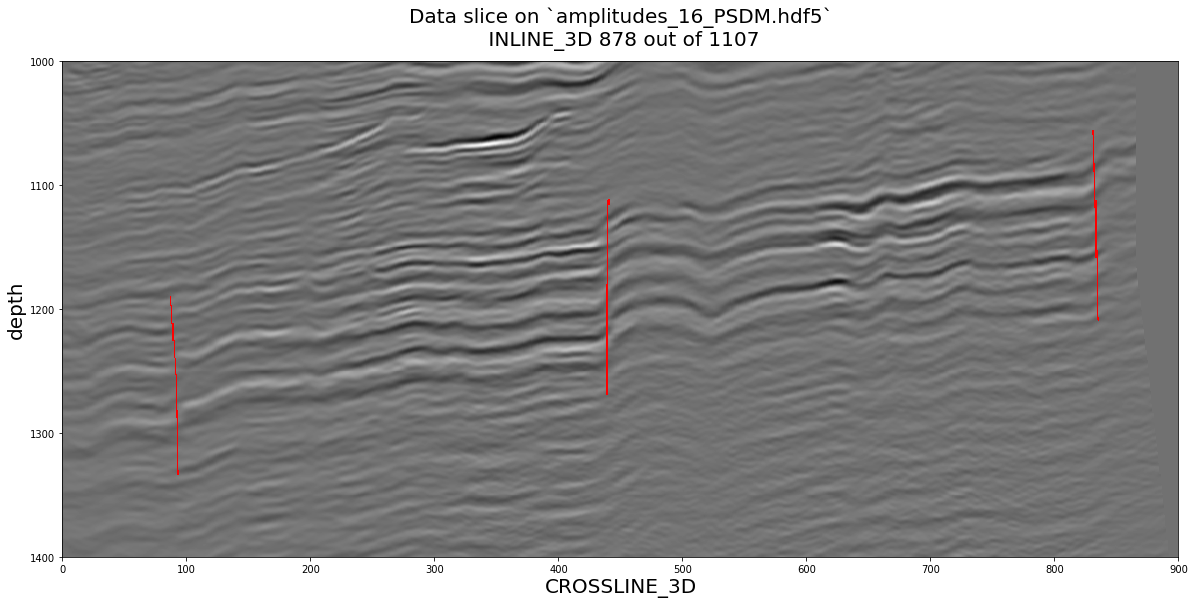

In [11]:
i = dataset.labels[0][0].points[0, 1]
zoom_slice = (slice(None), slice(1000, 1500))
dataset.show_slide(i, axis=0, zoom_slice=zoom_slice, figsize=(20, 10), mode='overlap')